# Проект: Оценка рыночной стоимости автомобилей

## Введение
Сервис по продаже автомобилей с пробегом "Не бит, не крашен" разрабатывает приложение, которое поможет клиентам узнать рыночную стоимость своего автомобиля. Для этой цели необходимо построить модель, которая способна определять стоимость автомобиля на основе его технических характеристик, комплектации и цен других автомобилей.

## Цель проекта

Цель проекта - построить модель для определения рыночной стоимости автомобилей с пробегом. Важные критерии - качество предсказания, время обучения и предсказания. Необходимо экспериментировать с разными моделями и гиперпараметрами, чтобы найти наилучший вариант.
## Задачи проекта
1. Построить модель, способную предсказывать рыночную стоимость автомобилей с пробегом.
2. Оценить качество предсказания модели с использованием метрики RMSE (среднеквадратичная ошибка).
3. Определить время обучения и время предсказания модели.
4. Сравнить разные модели, включая не только градиентный бустинг, но и более простые алгоритмы.

## Шаги проекта

- 1. Загрузка данных
Начнем с загрузки данных из файла `/datasets/autos.csv`. Эти данные будут использоваться для обучения и тестирования моделей.

- 2. Изучение данных и предобработка
Проанализируем данные, заполним пропущенные значения, и обработаем аномалии в столбцах. Если среди признаков найдутся неинформативные, удалим их, чтобы улучшить качество модели.

- 3. Подготовка выборок для обучения
Разделим данные на обучающую и тестовую выборки. Выделим целевую переменную (стоимость автомобиля) и признаки для обучения моделей.

- 4. Обучение разных моделей
Обучим несколько разных моделей, включая градиентный бустинг (например, LightGBM) и хотя бы одну более простую модель. Попробуем разные гиперпараметры для каждой модели.

- 5. Анализ времени обучения и предсказания
Оценим время обучения и время предсказания для каждой модели. Это важно для определения эффективности моделей в реальных условиях.

- 6. Оценка качества моделей
Используем метрику RMSE для оценки качества моделей. Значение RMSE должно быть меньше 2500.

- 7. Выбор лучшей модели и тестирование
Выберем лучшую модель на основе критериев заказчика и проверим ее качество на тестовой выборке.

- Заключение



## Описание данных

Данные представлены в файле `/datasets/autos.csv` и содержат информацию о продаже автомобилей. Датасет состоит из следующих признаков:

1. `DateCrawled` — дата скачивания анкеты из базы.
2. `VehicleType` — тип автомобильного кузова.
3. `RegistrationYear` — год регистрации автомобиля.
4. `Gearbox` — тип коробки передач.
5. `Power` — мощность (л. с.).
6. `Model` — модель автомобиля.
7. `Kilometer` — пробег (км).
8. `RegistrationMonth` — месяц регистрации автомобиля.
9. `FuelType` — тип топлива.
10. `Brand` — марка автомобиля.
11. `Repaired` — информация о том, была ли машина в ремонте.
12. `DateCreated` — дата создания анкеты.
13. `NumberOfPictures` — количество фотографий автомобиля.
14. `PostalCode` — почтовый индекс владельца анкеты (пользователя).
15. `LastSeen` — дата последней активности пользователя.

Целевой признак:

- `Price` — цена автомобиля в евро.

Данный датасет предназначен для задачи регрессии, где требуется предсказать цену автомобиля на основе имеющихся признаков.

## Import

In [1]:
#!pip install catboost
#!pip install lightgbm
#!pip install category-encoders

#!pip install tensorflow
#!pip install ydata-profiling
#!pip install --upgrade Pillow
#!pip install --upgrade pip
RANDOM_STATE=12345

import catboost as cb
from category_encoders.cat_boost import CatBoostEncoder
from catboost import CatBoostRegressor

from time import time

import optuna
import lightgbm
from lightgbm import LGBMRegressor
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import phik
from phik.report import plot_correlation_matrix
from phik import report

import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

import warnings

import ydata_profiling
from ydata_profiling import profile_report

from sklearn.dummy import DummyRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from category_encoders import CatBoostEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
import time
import pandas as pd
from sklearn.dummy import DummyRegressor

In [2]:
#Производим чтение файла с данными в переменную
try:
    df = pd.read_csv('/datasets/autos.csv',parse_dates=True) 
except:
    df=pd.read_csv(r'C:\Users\Admin\Desktop\Яндек-проекты\Автомобили регрессия\autos.csv',parse_dates=True)

## Предобработка данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))


               Price  RegistrationYear          Power      Kilometer  \
count  354369.000000     354369.000000  354369.000000  354369.000000   
mean     4416.656776       2004.234448     110.094337  128211.172535   
std      4514.158514         90.227958     189.850405   37905.341530   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       RegistrationMonth  NumberOfPictures     PostalCode  
count      354369.000000          354369.0  354369.000000  
mean            5.714645               0.0   50508.689087  
std             3.726421               0.0   25783.096248  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30165.

In [5]:
#убираем Numberof pictures,так как нули
df=df.drop('NumberOfPictures',axis=1)

In [6]:
# Фиксим даты
df['DateCrawled_YM'] = pd.to_datetime(df['DateCrawled'], format='%Y-%m-%d').dt.strftime('%Y-%m')
df['DateCreated_YM'] = pd.to_datetime(df['DateCreated'], format='%Y-%m-%d').dt.strftime('%Y-%m')
df['LastSeen_YM'] = pd.to_datetime(df['LastSeen'], format='%Y-%m-%d').dt.strftime('%Y-%m')
#Фиксим RegistrationMonth
df=df[(df['RegistrationMonth']>0)&(df['RegistrationMonth']<=12)]

In [7]:
df['RegistrationDate_YM'] = df['RegistrationYear'].astype(str) +'-' + df['RegistrationMonth'].apply(lambda x: str(x).zfill(2))


In [8]:
df=df[df['DateCrawled']>df['RegistrationDate_YM']] # убираем регистрации из будущего 

In [9]:
#Убираем скаченные записи из будущего 
df=df[df['DateCrawled']>=df['DateCreated']]

In [10]:
#удаляем дубликаты 
df=df.drop_duplicates()

In [11]:
#Проверяем нулевые значения
df.isna().sum()

DateCrawled                0
Price                      0
VehicleType             6547
RegistrationYear           0
Gearbox                 8680
Power                      0
Model                  11145
Kilometer                  0
RegistrationMonth          0
FuelType               12974
Brand                      0
Repaired               42779
DateCreated                0
PostalCode                 0
LastSeen                   0
DateCrawled_YM             0
DateCreated_YM             0
LastSeen_YM                0
RegistrationDate_YM        0
dtype: int64

In [12]:
df.head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen,DateCrawled_YM,DateCreated_YM,LastSeen_YM,RegistrationDate_YM
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,2016-03,2016-03,2016-04,2011-05
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,2016-03,2016-03,2016-04,2004-08
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,2016-03,2016-03,2016-03,2001-06


In [13]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))

               Price  RegistrationYear          Power      Kilometer  \
count  300941.000000     300941.000000  300941.000000  300941.000000   
mean     4798.756265       2002.515573     116.026876  127992.297494   
std      4622.060757          8.693605     176.977519   37118.187451   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1299.000000       1999.000000      75.000000  125000.000000   
50%      3099.000000       2003.000000     109.000000  150000.000000   
75%      6950.000000       2007.000000     145.000000  150000.000000   
max     20000.000000       2016.000000   20000.000000  150000.000000   

       RegistrationMonth     PostalCode  
count      300941.000000  300941.000000  
mean            6.364553   51003.708571  
std             3.357816   25756.830043  
min             1.000000    1067.000000  
25%             3.000000   30823.000000  
50%             6.000000   49835.000000  
75%             9.000000   71638.000000  
max            

In [14]:
# меняем колонки на нижний регистр
df.columns=df.columns.str.lower()

In [15]:
#заменяем пустые 
df['repaired']=df['repaired'].fillna('no')
df['vehicletype']=df['vehicletype'].fillna('not_stated')
df['gearbox']=df['gearbox'].fillna('not_stated')
df['model']=df['model'].fillna('not_stated')
df['fueltype']=df['fueltype'].fillna('not_stated')

In [16]:
#Проверяем нулевые значения
df.isna().sum()

datecrawled            0
price                  0
vehicletype            0
registrationyear       0
gearbox                0
power                  0
model                  0
kilometer              0
registrationmonth      0
fueltype               0
brand                  0
repaired               0
datecreated            0
postalcode             0
lastseen               0
datecrawled_ym         0
datecreated_ym         0
lastseen_ym            0
registrationdate_ym    0
dtype: int64

In [17]:
#удаляем дубликаты 
df=df.drop_duplicates()

In [18]:
# безопасный перевод в нумерик
df['registrationyear']=pd.to_numeric(df['registrationyear'], errors='coerce')
df['power']=pd.to_numeric(df['power'], errors='coerce')
df['price']=pd.to_numeric(df['price'], errors='coerce')
df['kilometer']=pd.to_numeric(df['kilometer'], errors='coerce')
df['registrationmonth']=pd.to_numeric(df['registrationmonth'], errors='coerce')

In [19]:
#удаляем дубликаты 
df=df.drop_duplicates()

In [20]:
df=df[(df.registrationyear>=1900)&(df.registrationyear<=2017)] #фильтр на даты

In [21]:
df.duplicated().sum()

0

In [22]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))

               price  registrationyear          power      kilometer  \
count  300923.000000     300923.000000  300923.000000  300923.000000   
mean     4798.888124       2002.554132     116.002104  127998.375000   
std      4622.054801          6.552242     176.877455   37109.116241   
min         0.000000       1910.000000       0.000000    5000.000000   
25%      1299.000000       1999.000000      75.000000  125000.000000   
50%      3099.000000       2003.000000     109.000000  150000.000000   
75%      6950.000000       2007.000000     145.000000  150000.000000   
max     20000.000000       2016.000000   20000.000000  150000.000000   

       registrationmonth     postalcode  
count      300923.000000  300923.000000  
mean            6.364695   51003.511257  
std             3.357817   25756.719953  
min             1.000000    1067.000000  
25%             3.000000   30823.000000  
50%             6.000000   49835.000000  
75%             9.000000   71638.000000  
max            

In [23]:
df=df.drop(['datecrawled', 'datecreated', 'lastseen'],axis=1)

In [24]:
df=df.drop_duplicates()

## Промежуточный вывод 1

В данных присутсвуют ошибки, пропуски и дубликаты.
были созданы дополнительные поля

`datecreated_ym`, `lastseen_ym`, `registrationdate_ym`, `datecrawled_ym`

Поля `datecrawled`, `datecreated`, `lastseen`  подлежат удалению

По категориальным признакам наблюдается смещение в сторону определенных значений, например:
   - `gearbox` - преобладает значение "manual".
   - `vehicletype` - преобладает значение "sedan".
   - `model` - преобладает значение "golf".
   - `fueltype` - преобладает значение "petrol".
   - `brand` - преобладает значение "volkswagen".
   - `repaired` - преобладает значение "no".

Эти наблюдения могут указывать на смещение в данных, что может повлиять на качество модели. Рекомендуется провести дополнительную обработку категориальных признаков для устранения смещения и улучшения моделирования.

# Визуализация данных

In [25]:
#функция гистограммы с сортировкой от большего к меньшему
def count_plot(column):
    sns.set_palette('rocket')
    plt.figure(figsize=(16, 8))

    if len(df[column].unique()) > 50:
        # Если количество уникальных значений больше 50, строим Pareto график
        value_counts = df[column].value_counts()
        top_values = value_counts.head(50)
        other_values = value_counts[50:].sum()
        
        # Создаем график Pareto
        sns.barplot(x=top_values.index, y=top_values.values, edgecolor='black', linewidth=1.2)
        plt.title(f'Top 50 значений по полю - {column}', fontsize=18)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Count', fontsize=18)
        plt.xticks(rotation=90, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.text(0.5, 1.05, f'Общее число значений нарушает качество визуализации, пропущено значений в поле: {other_values}', transform=plt.gca().transAxes, fontsize=14, ha='center')
    else:
        # В противном случае строим обычную гистограмму
        sns.countplot(data=df, x=column, order=df[column].value_counts().index, edgecolor='black', linewidth=1.2)
        plt.title(f'Гистограмма распределения по полю - {column}', fontsize=18)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Count', fontsize=18)
        plt.xticks(rotation=90, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

In [26]:
#функция boxplot 
def price_box_plot(column):
    sns.set_palette('pastel')
    plt.figure(figsize=(16, 8))

    if len(df[column].unique()) > 50:
        # Если количество уникальных значений больше 50, строим Pareto график
        value_counts = df[column].value_counts()
        top_values = value_counts.head(50)
        other_values = value_counts[50:].sum()
        
        # Создаем график по топ 50
        sns.boxplot(x=column, y='price', data=df[df[column].isin(top_values.index)], width=0.5, fliersize=5, palette='Paired')
        plt.title(f'Box plot: Top 50 {column} vs Price', fontsize=18)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.xticks(rotation=90, fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.text(0.5, 0.9,  f'Общее число значений нарушает качество визуализации, пропущено значений в поле: {other_values}', transform=plt.gca().transAxes, fontsize=14, ha='center')
    else:
        # В противном случае строим обычный box plot
        sns.boxplot(x=column, y='price', data=df, width=0.5, fliersize=5, palette='Paired')
        plt.title(f'Box plot: {column} vs Price', fontsize=18)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.xticks(rotation=90, fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
    
    
def price_box_plot(column):
    sns.set_palette('pastel')
    plt.figure(figsize=(16, 8))

    if len(df[column].unique()) > 50:
        # Если количество уникальных значений больше 50, строим Pareto график
        value_counts = df[column].value_counts()
        top_values = value_counts.head(50)
        other_values = value_counts[50:].sum()
        
        # Создаем график Pareto
        sns.boxplot(x=column, y='price', data=df[df[column].isin(top_values.index)], width=0.5, fliersize=5, palette='Paired')
        plt.title(f'Box plot: Top 50 {column} vs Price', fontsize=18)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.xticks(rotation=90, fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.text(0.5, 1.05, f'Общее число значений нарушает качество визуализации, пропущено значений в поле: {other_values}', transform=plt.gca().transAxes, fontsize=14, ha='center')
    else:
        # В противном случае строим обычный box plot
        sns.boxplot(x=column, y='price', data=df, width=0.5, fliersize=5, palette='Paired')
        plt.title(f'Box plot: {column} vs Price', fontsize=18)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)
        plt.xticks(rotation=90, fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()





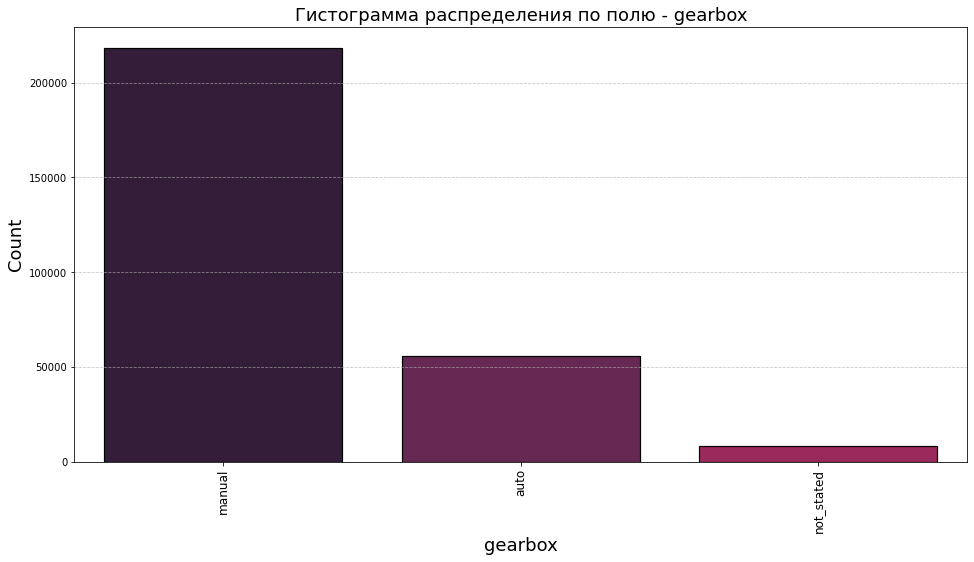

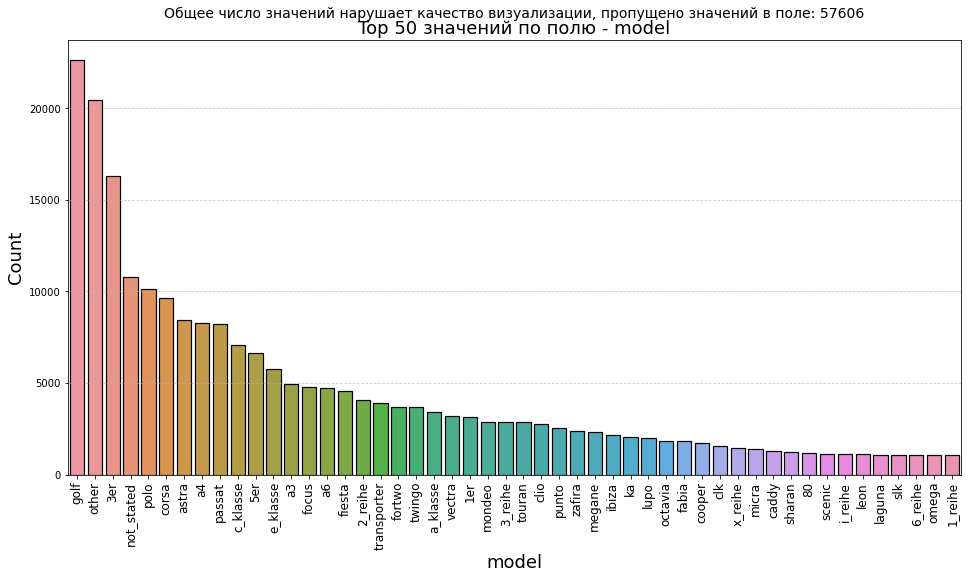

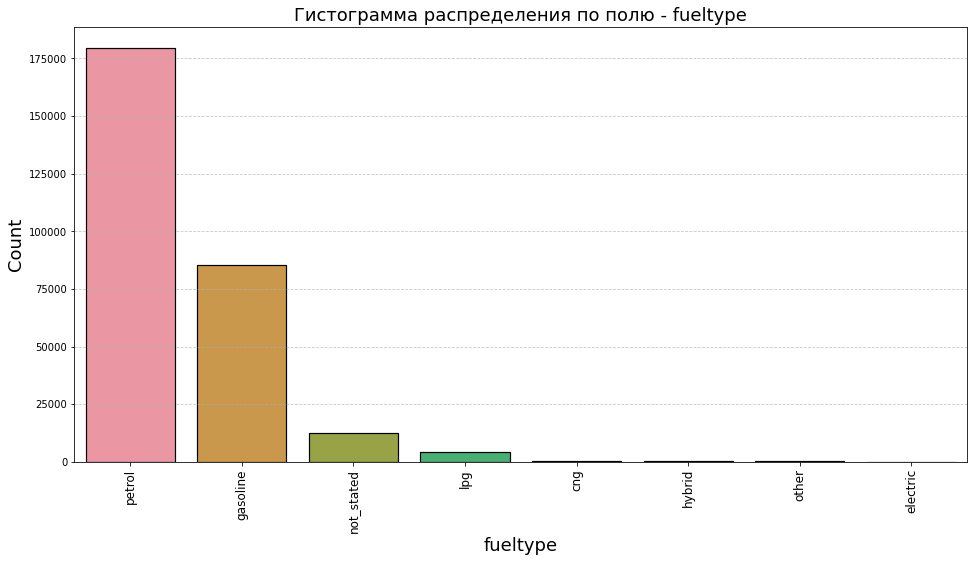

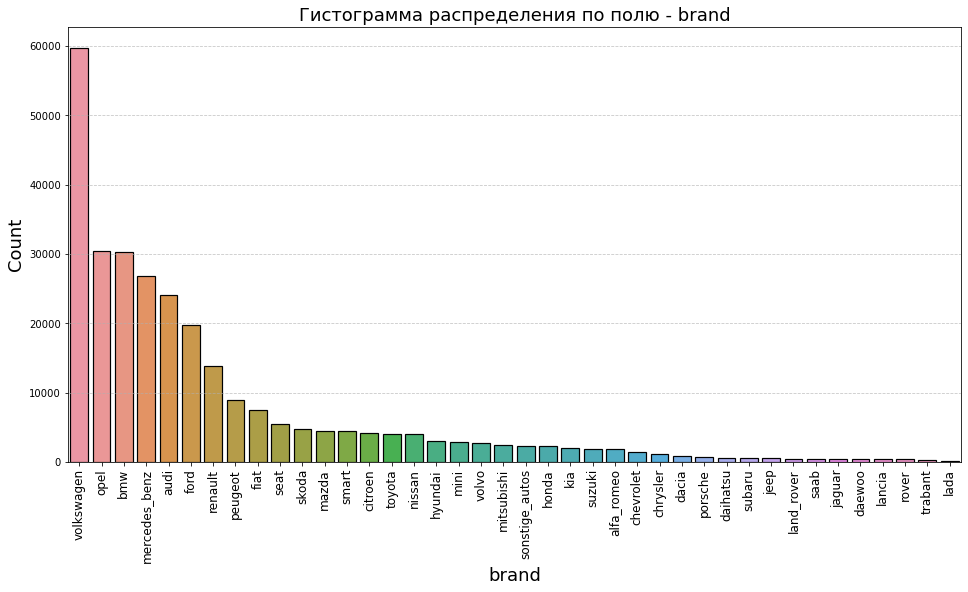

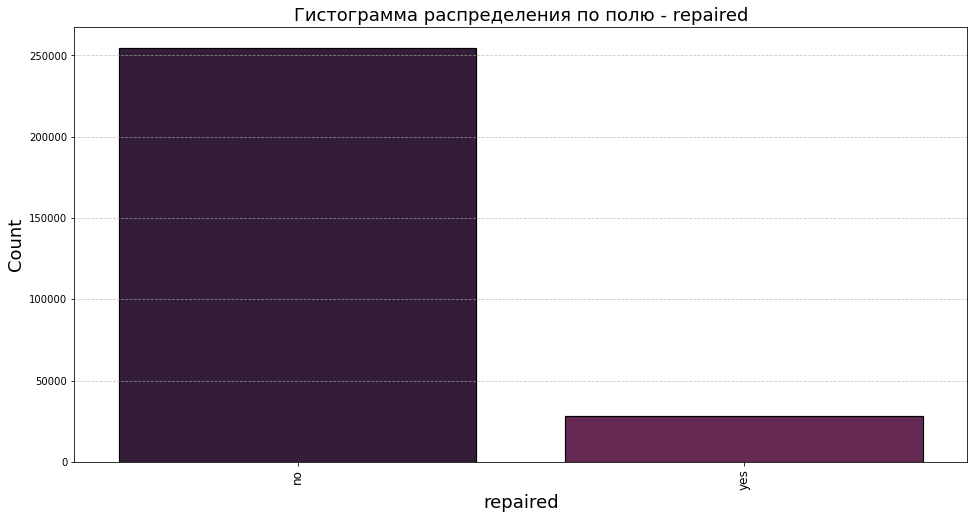

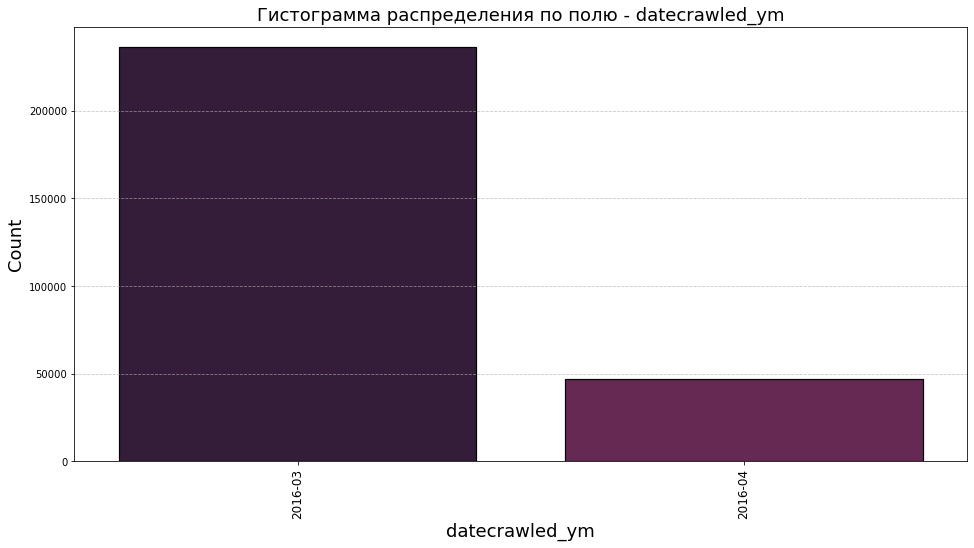

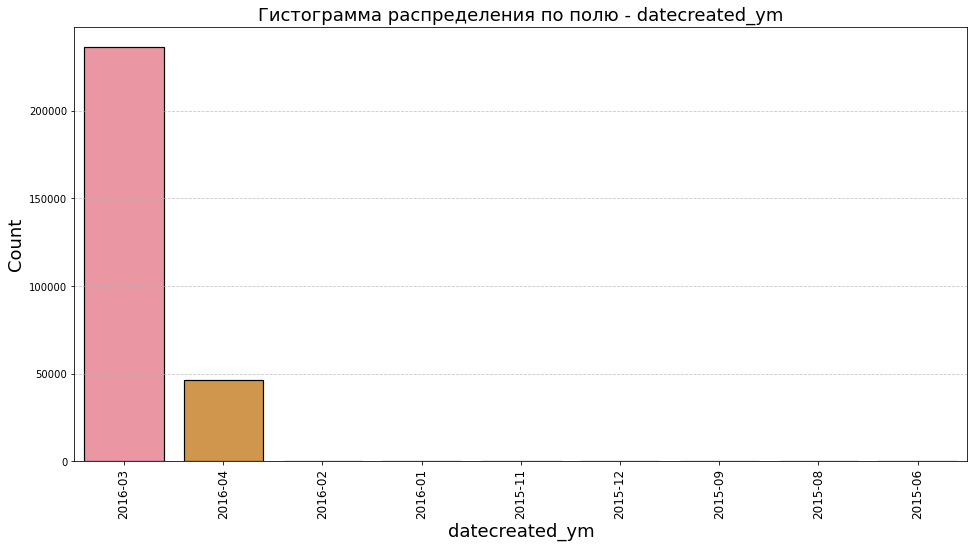

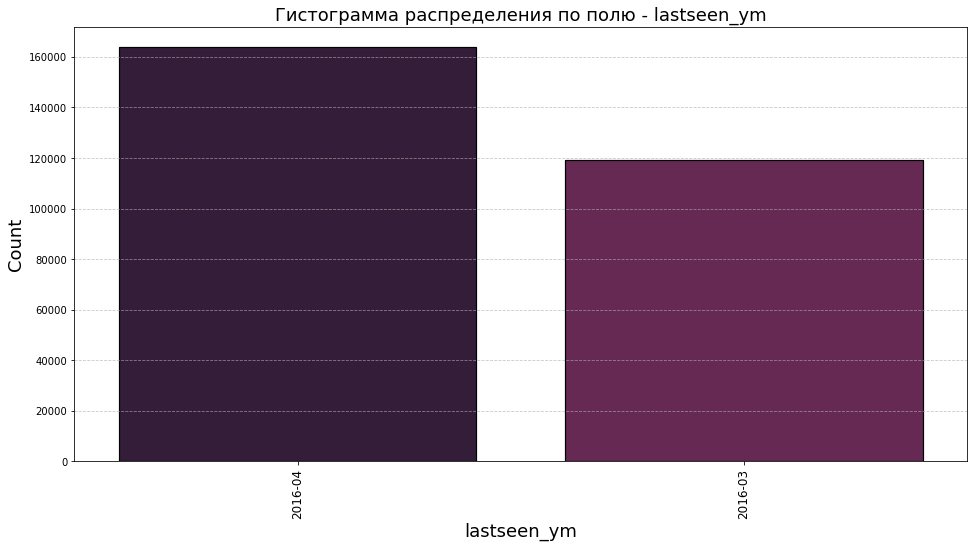

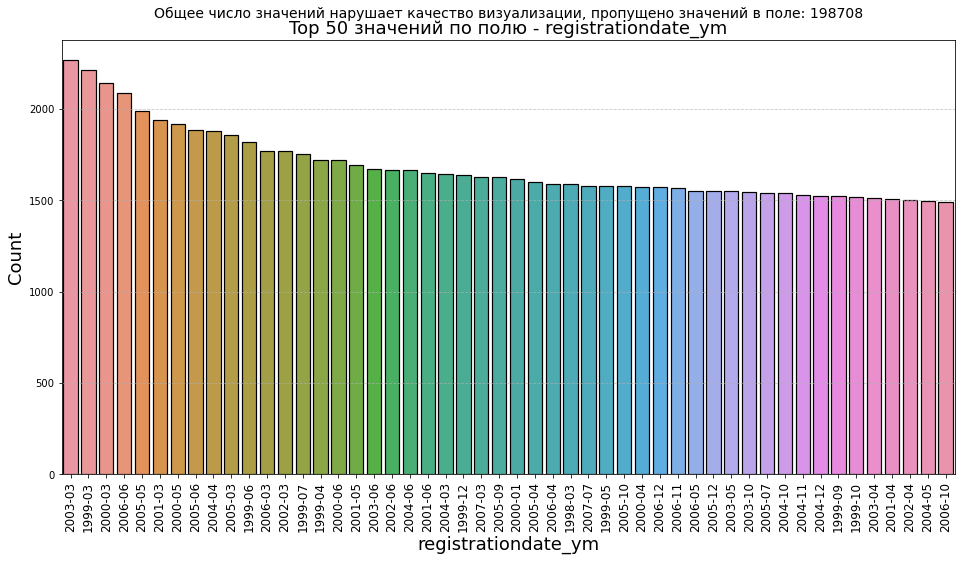

In [27]:
for x in df.select_dtypes(include=['object']).columns.to_list()[1:]:  count_plot(x)

## Промежуточный вывод 2

- `model` - имеет черезмерно большое количество сущностей внутри признака
-  `'datecrawled_ym'`и `'datecreated_ym'`,`'lastseen_ym'` можно удалить так как признаки содержит только 2 сущности и относится к дате,имеет смещение
- `'registrationdate_ym'`- можно удалить, так как признак содержит в себе более 12 уникальных значений и относится к дате,
-`kilometer` -километраж будем использовать в качестве показателя состояния оборудования 

In [28]:
df=df.drop(['datecrawled_ym', 'datecreated_ym','lastseen_ym','registrationdate_ym'],axis=1)

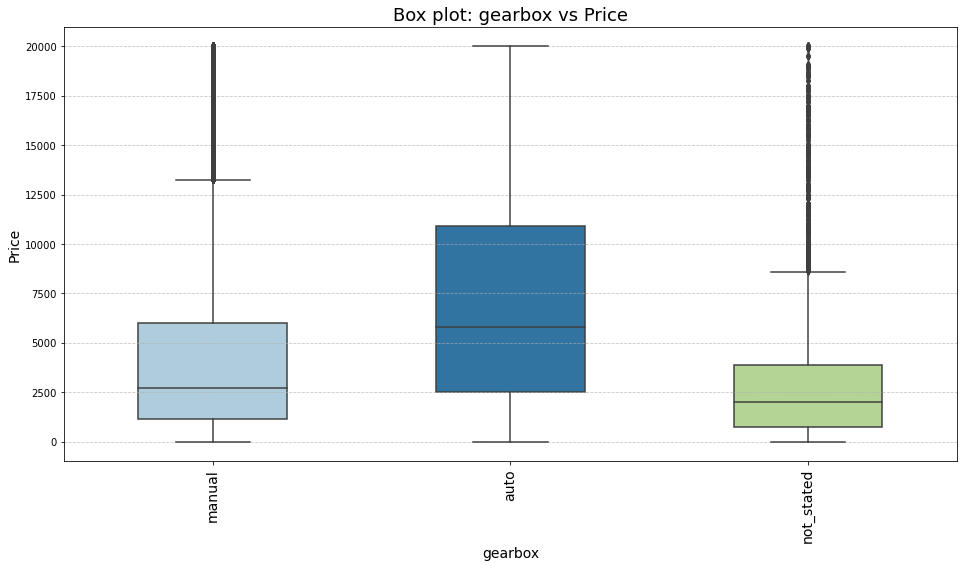

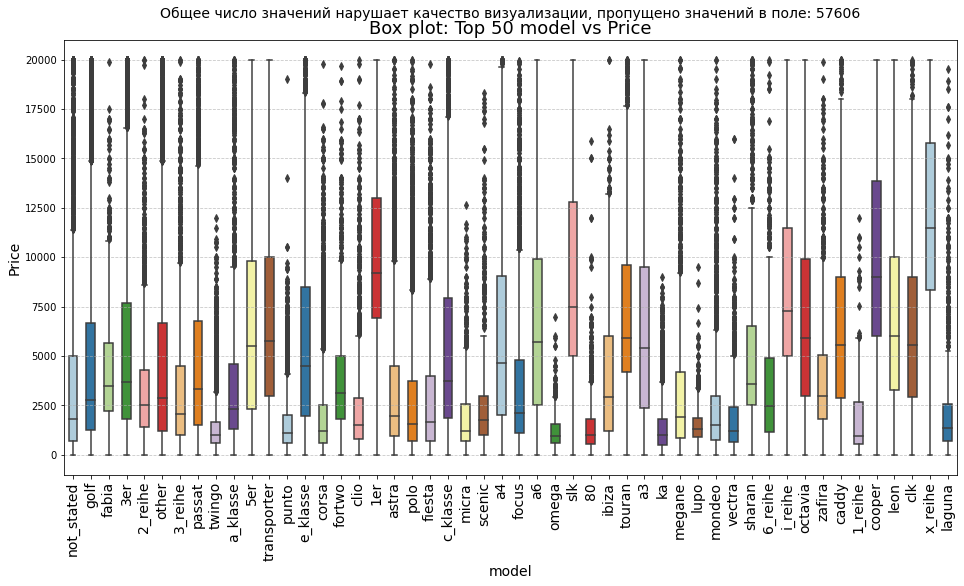

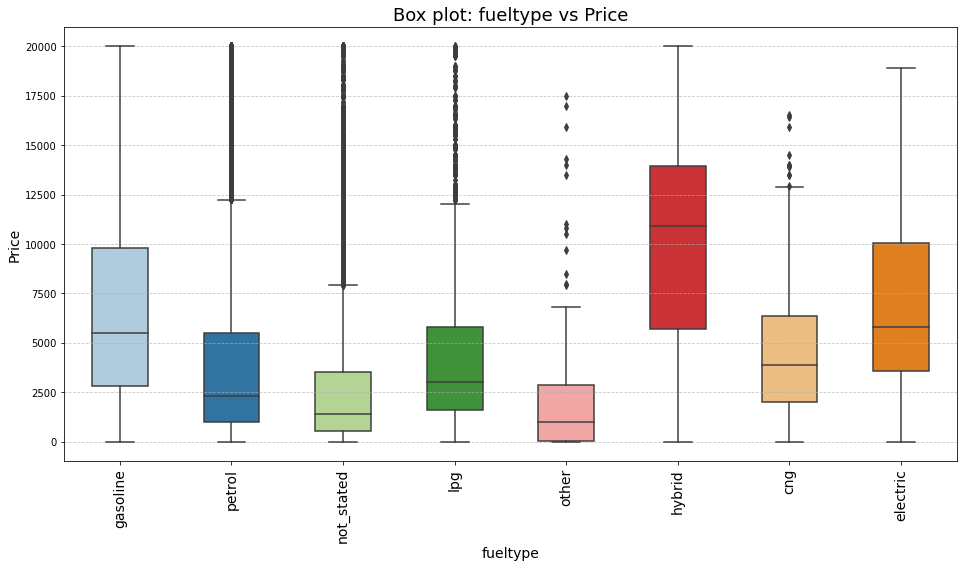

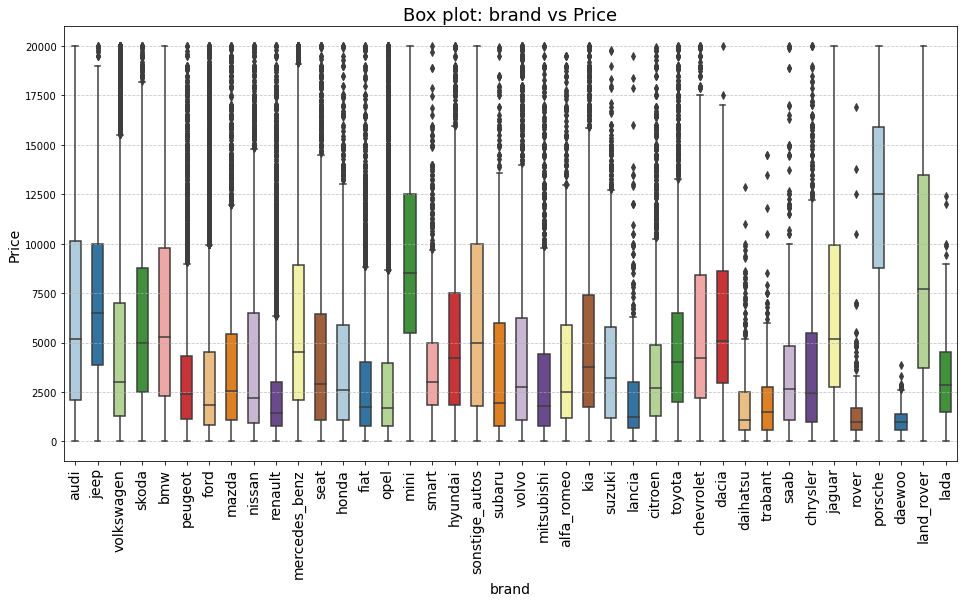

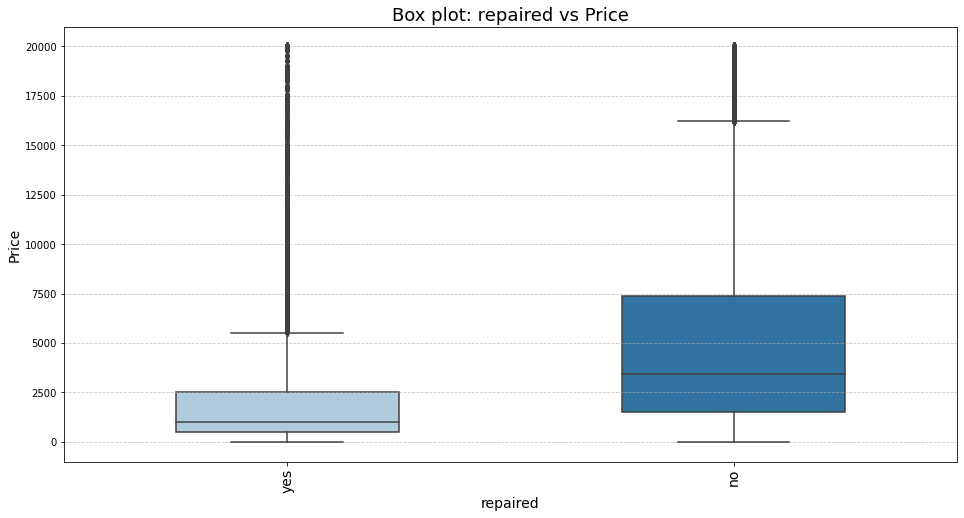

In [29]:
for x in df.select_dtypes(include=['object']).columns.tolist()[1:]:  price_box_plot(x)

Рассмотрим гистограммы количественного распределения по показателям, имеющим численное определение

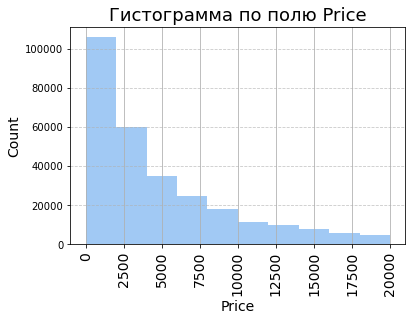

In [30]:
df.price.hist()
plt.title(f'Гистограмма по полю Price', fontsize=18)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Данные массива имеют смещение по полю `price` в сторону диапазона 0- 2500, 
наиболее вероятная причина - наличие большого количества старого оборудования с высокой наработкой

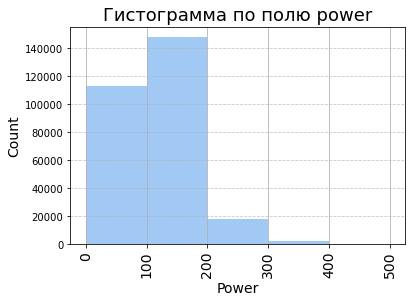

In [31]:
df.power.hist(bins=range(0,600,100))

plt.title(f'Гистограмма по полю power', fontsize=18)
plt.xlabel('Power', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [32]:
df[df.power==0]

,price,vehicletype,registrationyear,gearbox,power,model,kilometer,registrationmonth,fueltype,brand,repaired,postalcode
32,245,sedan,1994,not_stated,0,golf,150000,2,petrol,volkswagen,no,44145
37,1500,not_stated,2016,not_stated,0,kangoo,150000,1,gasoline,renault,no,46483
40,0,not_stated,1990,not_stated,0,corsa,150000,1,petrol,opel,no,56412
55,550,wagon,1999,manual,0,astra,150000,8,gasoline,opel,yes,56759
70,800,small,1993,manual,0,polo,150000,3,petrol,volkswagen,no,8258
...,...,...,...,...,...,...,...,...,...,...,...,...
354335,390,small,1997,auto,0,corsa,100000,6,petrol,opel,yes,17509
354338,180,not_stated,1995,not_stated,0,not_stated,125000,3,petrol,opel,no,41470
354346,2600,not_stated,2005,auto,0,c_klasse,150000,9,not_stated,mercedes_benz,no,61169
354364,0,not_stated,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2694


В массиве оборудование преимущественно `power` [0, 200], присутсвуют машины с нулевой мощностью, которые подлежат удалению

In [33]:
df=df[df.power!=0]

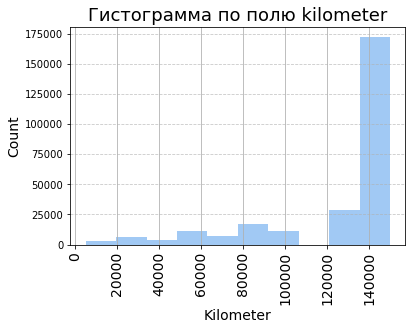

In [34]:
df.kilometer.hist()
plt.title(f'Гистограмма по полю kilometer', fontsize=18)
plt.xlabel('Kilometer', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Массив имеет смещение по полю `kilometer` в сторону  машин с высокой наработкой от 120000 до 140000, вероятная причина- низкая стоимость последних, также данное поле мы будем использовать как категорию

In [35]:
# корр матрица phik 
phik_corrs = df.phik_matrix(interval_cols=['power','price'])

C:\Users\Admin\anaconda3\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable postalcode is large: 8095. Are you sure this is not an interval variable? Analysis for pairs of variables including postalcode can be slow.
  warnings.warn(


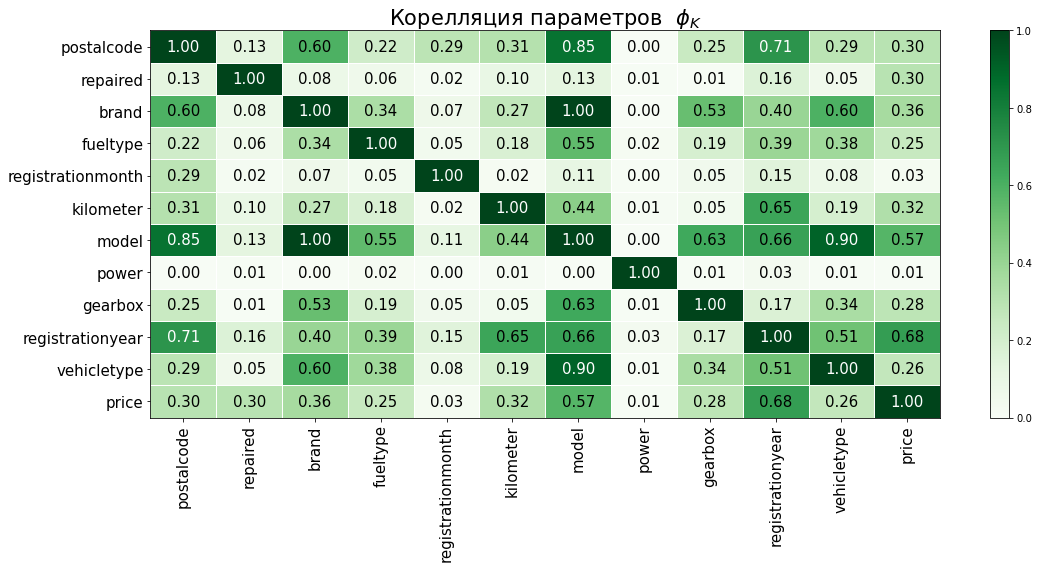

In [36]:
plot_correlation_matrix(phik_corrs.values, 
                        x_labels=phik_corrs.columns, 
                        y_labels=phik_corrs.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корелляция параметров  $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()

`postalcode`- удаляем
`brand`-удаляем
`model`- удаляем
на таргет оказывают влияние 2 параметра это  `registrationyear` и `kilometer`, в свою очередь данные критерии созависимы, поэтому как индикатор состояния оставим пробег (`kilometer`) 

In [37]:
df=df.drop('postalcode',axis=1)

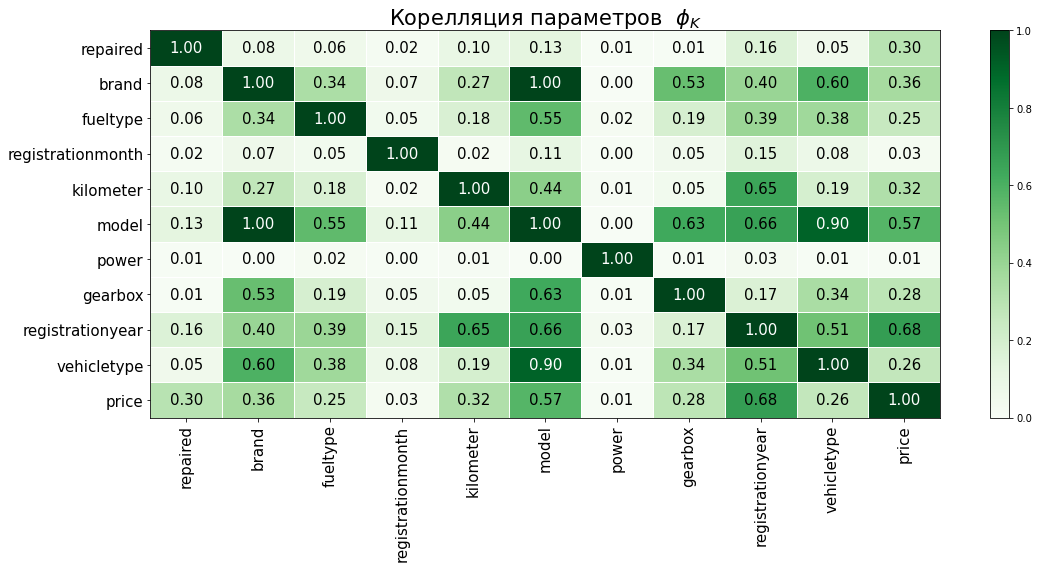

In [38]:
phik_corrs = df.phik_matrix(interval_cols=['power','price'])
plot_correlation_matrix(phik_corrs.values, 
                        x_labels=phik_corrs.columns, 
                        y_labels=phik_corrs.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корелляция параметров  $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()

In [39]:
df=df.drop('registrationyear',axis=1)
df=df.drop_duplicates()
df=df.drop('registrationmonth',axis=1)
df=df.drop_duplicates()

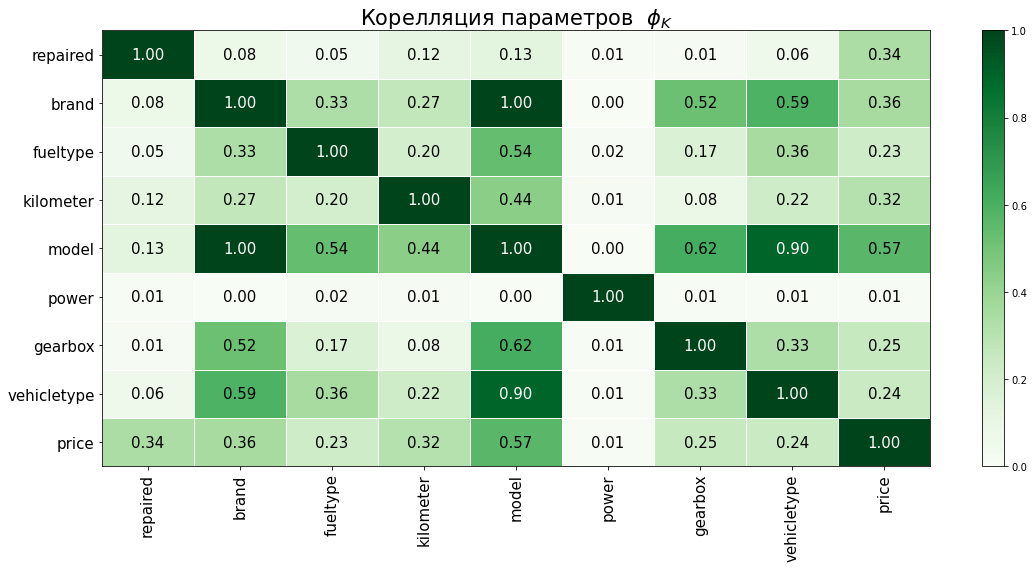

In [40]:
phik_corrs = df.phik_matrix(interval_cols=['power','price'])
plot_correlation_matrix(phik_corrs.values, 
                        x_labels=phik_corrs.columns, 
                        y_labels=phik_corrs.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корелляция параметров  $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()

удаляем `model`,`'brand'` оставляем `'price', 'vehicletype', 'gearbox', 'power', 'kilometer', 'fueltype',
       'repaired'`

In [41]:
df=df.drop('model',axis=1)
df=df.drop_duplicates()
df=df.drop('brand',axis=1)
df=df.drop_duplicates()

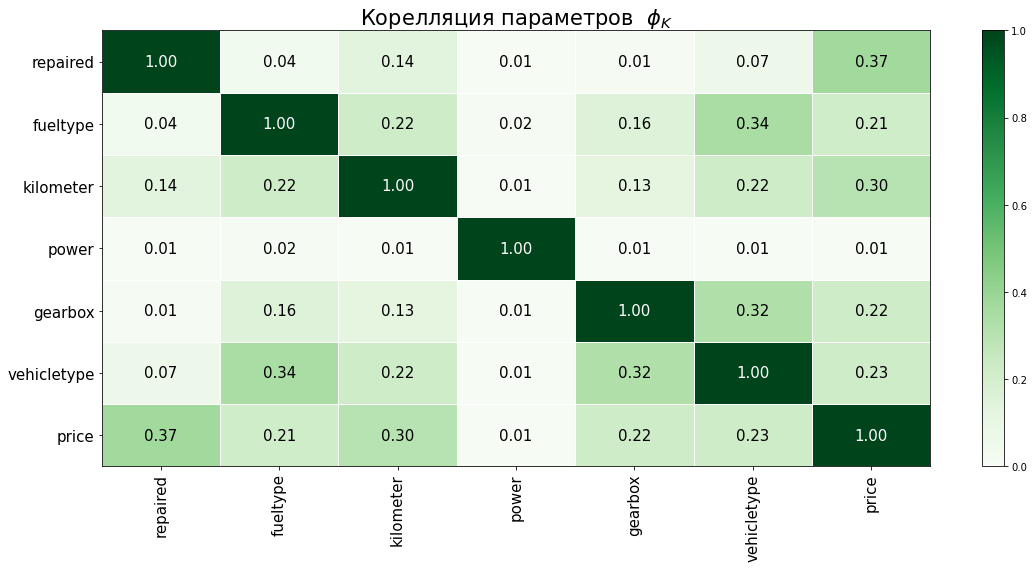

In [42]:
phik_corrs = df.phik_matrix(interval_cols=['power','price'])
plot_correlation_matrix(phik_corrs.values, 
                        x_labels=phik_corrs.columns, 
                        y_labels=phik_corrs.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корелляция параметров  $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(16, 8))
plt.tight_layout()

In [43]:
df.columns

Index(['price', 'vehicletype', 'gearbox', 'power', 'kilometer', 'fueltype',
       'repaired'],
      dtype='object')

In [44]:
def stripp(df):
    df['vehicletype']=df['vehicletype'].str.strip()
    df['gearbox']=df['gearbox'].str.strip()
    df['fueltype']=df['fueltype'].str.strip()
    
    
    return df

In [45]:
#Исключаем пробелы из категорий
df=stripp(df)

## Промежуточный вывод 2

В процессе анализа данных обнаружена созависимость между некоторыми критериями, например:

1. Наблюдается созависимость между полем `postalcode` и критериями `registration year`, `model`, `brand`. Это может указывать на связь между местоположением и характеристиками автомобиля.

2. Обнаружена слабая положительная взаимосвязь между полем `price` и критерием `repaired`, а также другими признаками. Эти наблюдения могут объяснять, почему удаление полей `registration year` и `registration month` может быть целесообразным для улучшения моделирования.


Для более точного моделирования и устранения мультиколлинеарности рекомендуется провести дополнительные преобразования данных и анализ взаимосвязей между признаками.

После проведенного анализа и обработки данных, было решено оставить следующие поля для дальнейшего моделирования:

1. `repaired` - состояние ремонта автомобиля.
2. `fueltype` - тип топлива.
3. `kilometr` - пробег автомобиля.
4. `power` - мощность двигателя.
5. `gearbox` - тип коробки передач.
6. `vehicletype` - тип автомобиля.
7. `price` - цена автомобиля.

Эти признаки были выбраны на основе их значимости и важности для построения модели. Дальнейший анализ и моделирование будет проводиться с использованием указанных признаков.

In [46]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))

               price          power      kilometer
count  168996.000000  168996.000000  168996.000000
mean     5866.614435     134.197940  120086.244645
std      4992.992323     228.491343   40876.761134
min         0.000000       1.000000    5000.000000
25%      1850.000000      90.000000   90000.000000
50%      4350.000000     118.000000  150000.000000
75%      8722.500000     160.000000  150000.000000
max     20000.000000   20000.000000  150000.000000
       vehicletype gearbox fueltype repaired
count       168996  168996   168996   168996
unique           9       3        8        2
top          sedan  manual   petrol       no
freq         46456  123403   103648   149706


In [47]:
df_describe=df.describe()

In [48]:
df=df[(df['power']!=0)&(df['price']!=0)]

In [49]:
# Функция вывода пределов для сброса по методу IQR принимает на вход массив.describe() из числовых значений
# Рекомендация  использовать значения типа float | int 
# индекс- колонка с названием исходного столбца 
def iqr(stat_df_describe):
    stat_df_describe=pd.DataFrame(stat_df_describe.describe())
    stat_df_describe=stat_df_describe.reset_index(drop=True)
    #print(stat_df_describe)
    top_limit=[]
    bot_limit=[]
    columns_lst=[]
    for value in stat_df_describe.columns:
        limit_up=stat_df_describe[value][6]+1.5*(stat_df_describe[value][6]-stat_df_describe[value][4])
        limit_low=stat_df_describe[value][4]-1.5*(stat_df_describe[value][6]-stat_df_describe[value][4])
        top_limit.append(limit_up)
        bot_limit.append(limit_low)
        columns_lst.append(value)
        dictionary={'Columns':columns_lst, 'Top_limit':top_limit,'Bot_limit':bot_limit}
        a=pd.DataFrame(dictionary)
                
        
    return a

In [50]:
def filter_by_iqr(df, column, whisker_width=1.5):
    """Функция убирает выбросы из массива по названию колонки, также можно регулировать размер усов,
    убираются строки, значения которых меньше Q1-1.5IQR или больше, чем Q3+1.5IQR.
    Аргументы:
        df (`:obj:pd.DataFrame`): датафрейм
        column (str): название колонки
        whisker_width (float): коэффициент размера уса
    Возвращает:
        (`:obj:pd.DataFrame`): отфильтрованый по IQR датафрейм
    """
    # Высчитываем Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # применяем фильтрацию
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]   

In [51]:
#Фильтруем значения массива по IQR
df=filter_by_iqr(df,'price',whisker_width=1.5)
df=filter_by_iqr(df,'power',whisker_width=1.5)
df=filter_by_iqr(df,'kilometer',whisker_width=1.5)
df

,price,vehicletype,gearbox,power,kilometer,fueltype,repaired
1,18300,coupe,manual,190,125000,gasoline,yes
2,9800,suv,auto,163,125000,gasoline,no
3,1500,small,manual,75,150000,petrol,no
4,3600,small,manual,69,90000,gasoline,no
5,650,sedan,manual,102,150000,petrol,yes
...,...,...,...,...,...,...,...
354357,1690,wagon,manual,55,150000,petrol,no
354360,3999,wagon,manual,3,150000,gasoline,no
354362,3200,sedan,manual,225,150000,petrol,yes
354366,1199,convertible,auto,101,125000,petrol,no


In [52]:
#более подробная статистика по числовым значениям
with pd.option_context('display.max_columns', None):
    print(df.describe())
#Более подробная статистика по категориальным 
with pd.option_context('display.max_columns', None):
    print(df.describe(include=object))

               price          power     kilometer
count  159881.000000  159881.000000  159881.00000
mean     5634.899094     122.471845  120063.51599
std      4685.981048      47.142087   40701.61042
min         1.000000       1.000000    5000.00000
25%      1850.000000      86.000000   90000.00000
50%      4200.000000     116.000000  150000.00000
75%      8333.000000     150.000000  150000.00000
max     19150.000000     258.000000  150000.00000
       vehicletype gearbox fueltype repaired
count       159881  159881   159881   159881
unique           9       3        8        2
top          sedan  manual   petrol       no
freq         43208  119627    97761   141654


In [53]:
df=df.drop_duplicates()
#Проверка отфильтрованного массива на дубликаты
df.duplicated().sum()

0

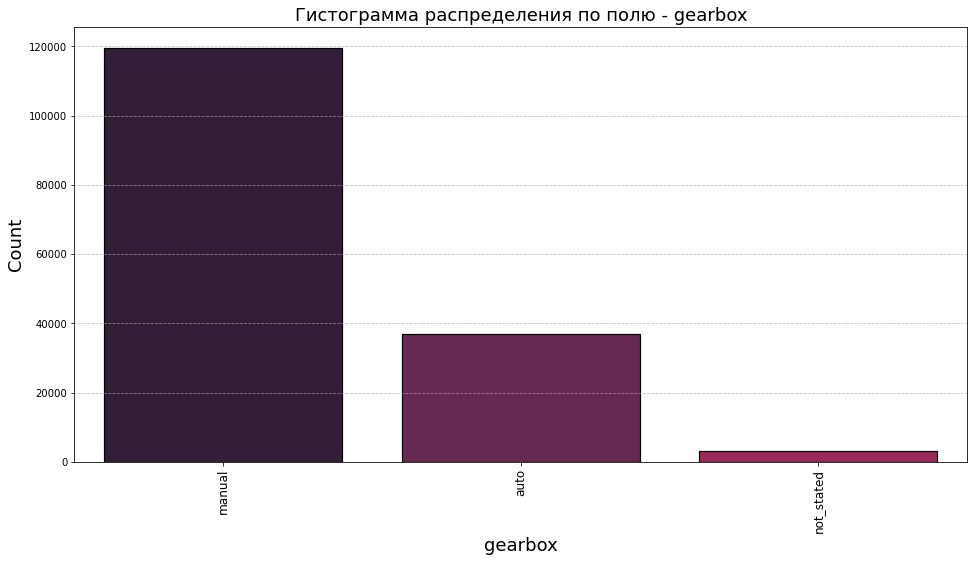

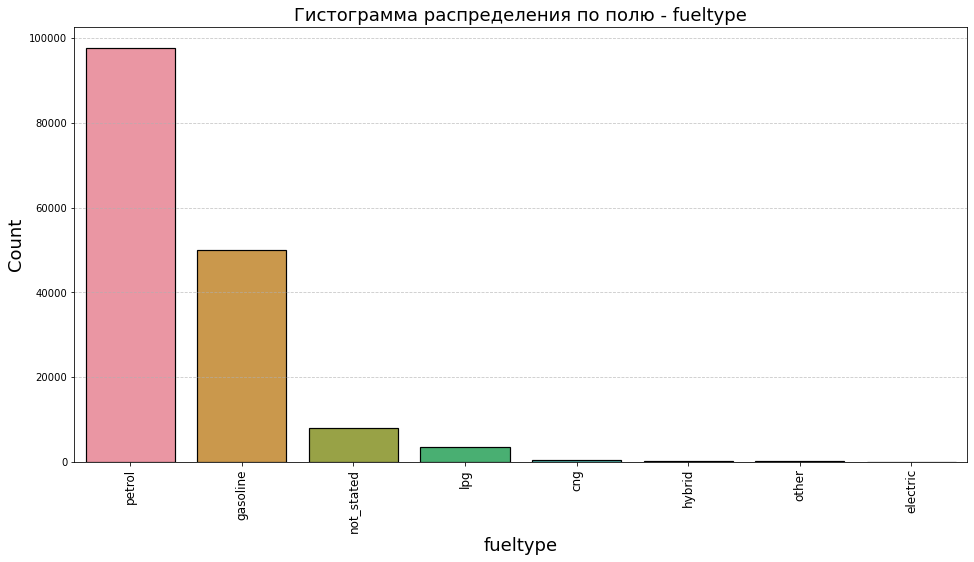

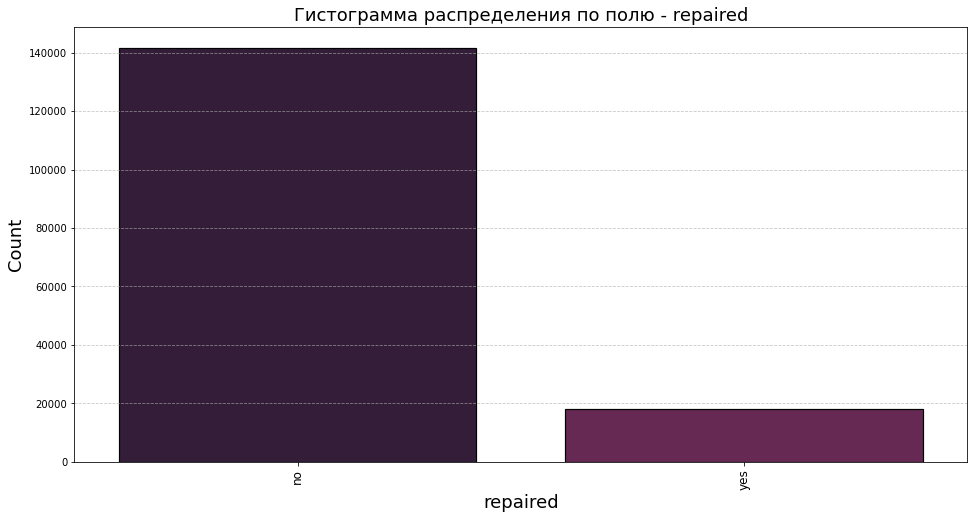

In [54]:
for x in df.select_dtypes(include=['object']).columns.to_list()[1:]:count_plot(x)

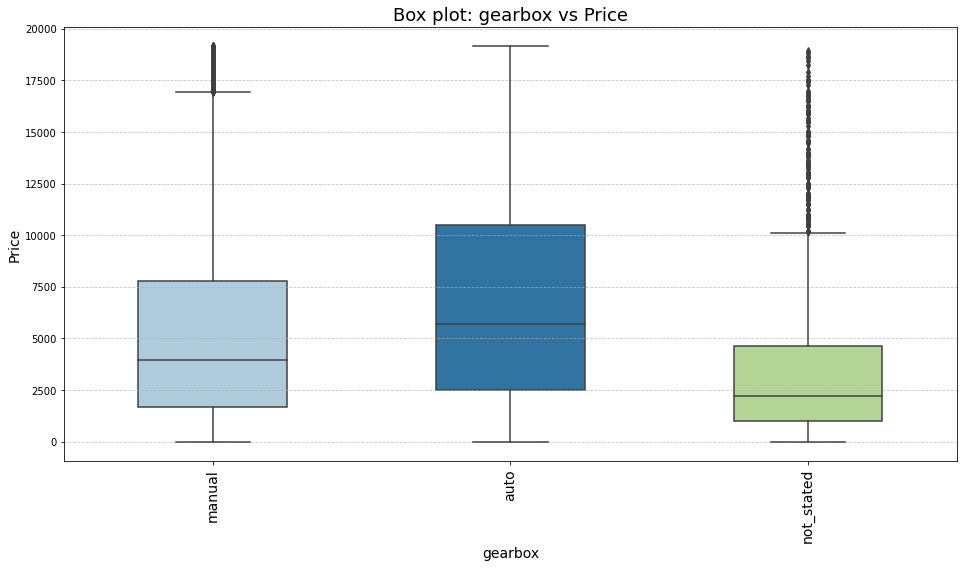

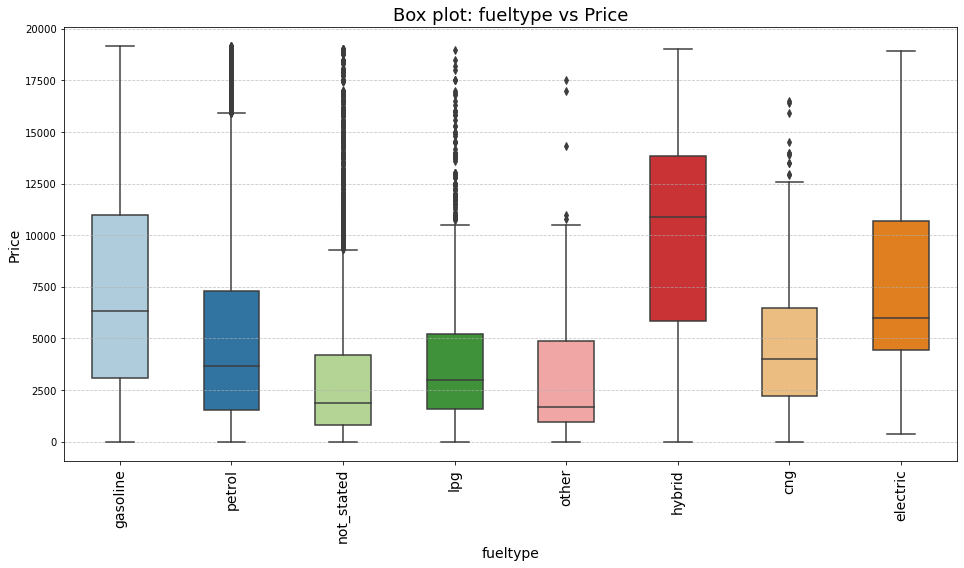

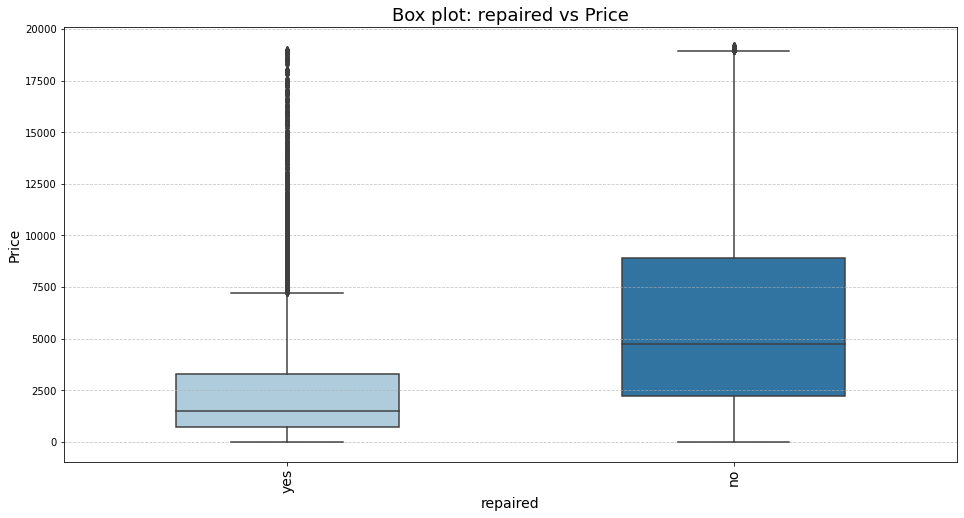

In [55]:
for x in df.select_dtypes(include=['object']).columns.tolist()[1:]:price_box_plot(x)

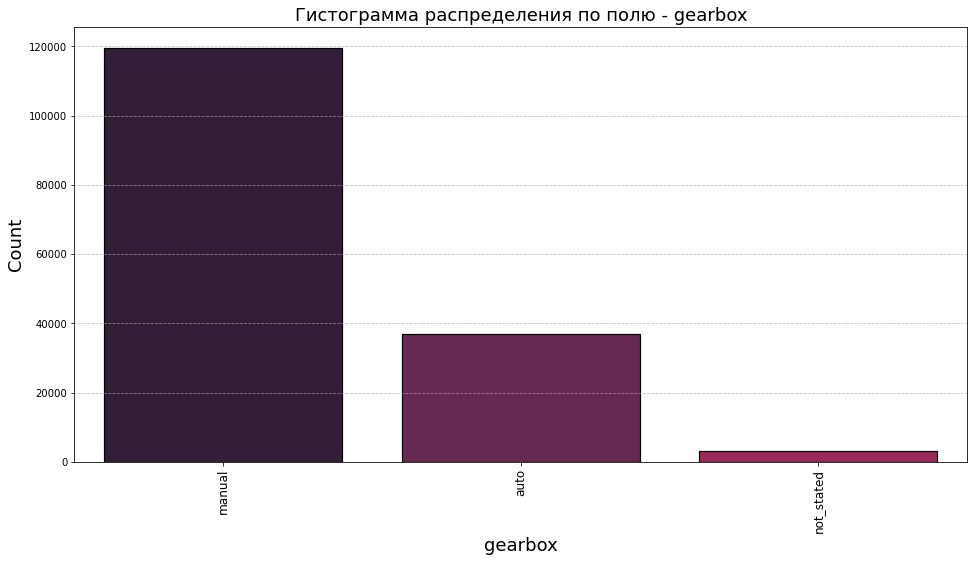

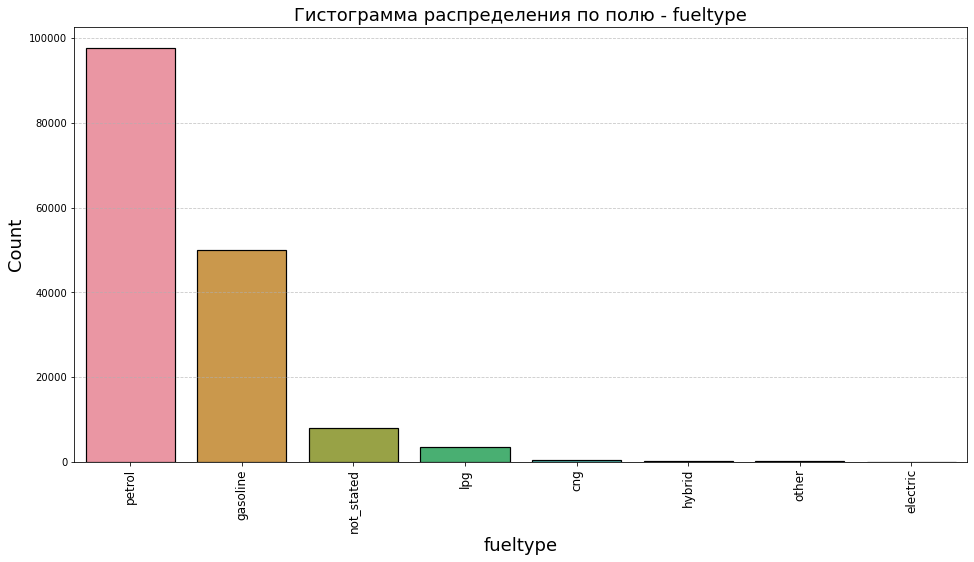

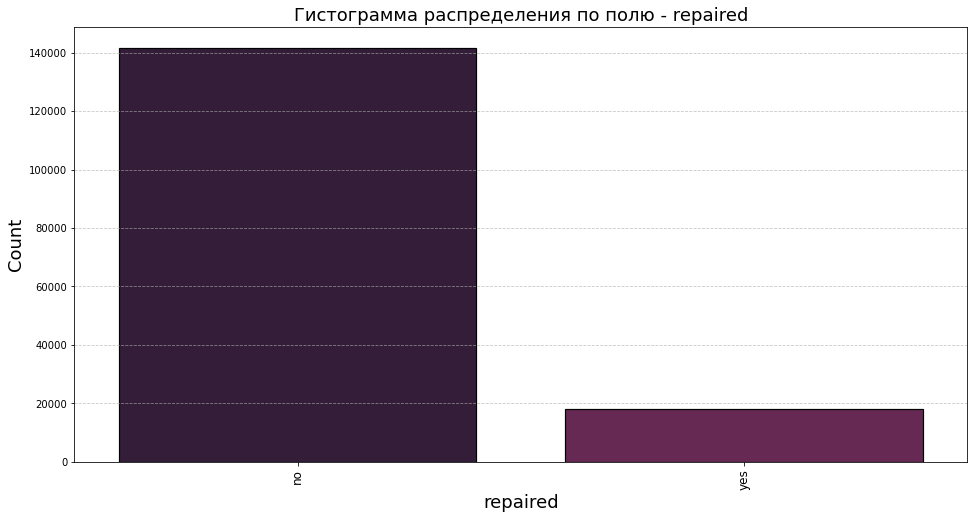

In [56]:
for x in df.select_dtypes(include=['object','bool']).columns.to_list()[1:]:count_plot(x)

Отчет по массиву

In [57]:
profile = df.profile_report(title='df_filtered Profiling Report', progress_bar=False)
profile

## Вывод по блоку

# В данных обнаружены следующие проблемы:

1. Поле `registrationyear` содержит ошибки, такие как неверные даты 9999 и 1000. Требуется коррекция данных в этом поле.

2. Обнаружено 10.7% строк с незаполненным месяцем регистрации. Поскольку эти данные могут быть важными, решено удалить строки с отсутствующим месяцем регистрации.

3. Выявлено смещение в категориальных признаках, таких как `gearbox`, `vehicletype`, `model`, `fueltype`, `brand`, `repaired`. Например, наблюдается доминирование значений, таких как `gearbox` - "manual", `vehicletype` - "sedan", `model` - "golf", `fueltype` - "petrol", `brand` - "volkswagen", `repaired` - "no". Это может повлиять на качество модели.

4. Наблюдается созависимость между некоторыми признаками, например, между `postalcode`, `registrationyear`, `model`, `brand`.

5. Обнаружена слабая положительная взаимосвязь между `price` и `repaired` и другими признаками. Это может быть одной из причин удаления полей `registrationyear` и `registrationmonth`.

6. В данных присутствуют выбросы, и категория `model` имеет слишком большое количество уникальных значений, что может повлиять на моделирование. Необходимо рассмотреть их и, возможно, произвести сокращение.

7. Основная часть автомобилей в наборе данных имеет механическую коробку передач, а также большинство автомобилей работает на бензине.

8. По брендам автомобилей не наблюдается явной зависимости от ценового диапазона.

# В результате проведенных анализов было решено оставить следующие поля: `repaired`, `fueltype`, `kilometr`, `power`, `gearbox`, `vehicletype`, `price`.


## Формирование X и y

In [58]:
X = df.drop(['price'], axis=1)
y = df['price']

In [59]:
X["kilometer"] = X["kilometer"].astype('object')

## Формирование X_train, X_valid, y_train, y_valid


In [60]:
#Делим массив на трейн и тест
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=RANDOM_STATE)

In [61]:
# Определение списков категориальных и числовых признаков
categorical_columns = X.select_dtypes(include=['object','bool']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64','float64']).columns.tolist()

# Создание преобразователей для числовых и категориальных признаков
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', CatBoostEncoder())
])

# Создание общего преобразователя для всех признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


# Определение списка моделей и их гиперпараметров
models = [
    ('Linear Regression', LinearRegression()),
    ('LGBM Regressor', LGBMRegressor(random_state=12345)),
    ('CatBoost Regressor', CatBoostRegressor(random_state=12345, verbose=0))
]

param_grid = [
    {'regression': [LinearRegression()]},
    {'regression': [LGBMRegressor(random_state=12345)]},
    {'regression': [CatBoostRegressor(random_state=12345, verbose=0)]}
]

# Создание списка для хранения результатов
results = []

for name, model in models:
    start_time = time.time()
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regression', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    training_time = time.time() - start_time
    
    start_time = time.time()
    
    y_valid_pred = pipeline.predict(X_valid)
    y_test_pred = pipeline.predict(X_test)
    
    prediction_time = time.time() - start_time
    
    mse_valid = mean_squared_error(y_valid, y_valid_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_valid = mean_absolute_error(y_valid, y_valid_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_valid = r2_score(y_valid, y_valid_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    results.append([name, mse_valid, mse_test, mae_valid, mae_test, r2_valid, r2_test, training_time, prediction_time])

# Создание DataFrame с результатами
results_df = pd.DataFrame(results, columns=['Model', 'MSE_Valid', 'MSE_Test', 'MAE_Valid', 'MAE_Test', 'R2_Valid', 'R2_Test', 'Training Time', 'Prediction Time'])

# Отображение результатов
results_df


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of data points in the train set: 119910, number of used features: 6
[LightGBM] [Info] Start training from score 5641.600375


,Model,MSE_Valid,MSE_Test,MAE_Valid,MAE_Test,R2_Valid,R2_Test,Training Time,Prediction Time
0,Linear Regression,1.061413e+07,1.056673e+07,2528.176007,2507.652813,0.513648,0.514525,0.455476,0.099667
1,LGBM Regressor,8.151367e+06,8.091056e+06,2109.181724,2094.752061,0.626495,0.628267,0.775553,0.162470
2,CatBoost Regressor,7.980433e+06,7.903897e+06,2078.740449,2064.733350,0.634327,0.636866,8.108924,0.058809


Результаты интерпретации метрик для различных моделей:

1. `Model` - Названия моделей:
   - `Linear Regression` - Линейная регрессия.
   - `LGBM Regressor` - Градиентный бустинг на основе LightGBM.
   - `CatBoost Regressor` - Градиентный бустинг на основе CatBoost.

2. `MSE_Valid` и `MSE_Test` - Среднеквадратичная ошибка (Mean Squared Error) на валидационной и тестовой выборках. Это метрика, которая измеряет среднеквадратичное отклонение предсказанных значений от реальных значений. Меньшие значения MSE указывают на более точные модели.

3. `MAE_Valid` и `MAE_Test` - Средняя абсолютная ошибка (Mean Absolute Error) на валидационной и тестовой выборках. Эта метрика измеряет среднее абсолютное отклонение предсказанных значений от реальных значений. Меньшие значения MAE также указывают на более точные модели.

4. `R2_Valid` и `R2_Test` - Коэффициент детерминации R-квадрат (R-squared) на валидационной и тестовой выборках. Этот коэффициент измеряет долю дисперсии зависимой переменной, объясненной моделью. Значения ближе к 1 указывают на лучшую соответствие модели данным.

5. `Training Time` - Время обучения модели на обучающей выборке. Это время, затраченное на тренировку модели.

6. `Prediction Time` - Время, затраченное на предсказание с использованием модели на тестовой выборке.

**Интерпретация результатов:**
- Модель `CatBoost Regressor` имеет наименьшее значение MSE как на валидационной, так и на тестовой выборке, что указывает на наилучшую точность прогнозов среди рассмотренных моделей.
- Модель `CatBoost Regressor` также показывает наивысший коэффициент детерминации R-квадрат как на валидационной, так и на тестовой выборке, что означает, что она лучше объясняет дисперсию зависимой переменной.
- Время обучения модели `CatBoost Regressor` значительно выше по сравнению с другими моделями, но время предсказания остается низким.
- Модель `LGBM Regressor` также демонстрирует хорошие результаты и близка к `CatBoost Regressor` по метрикам, но обучается и предсказывает быстрее.
- Модель `Linear Regression` имеет наименьший коэффициент детерминации R-квадрат и более высокие значения MSE и MAE, что указывает на менее точные прогнозы по сравнению с градиентными бустингами.

In [62]:


dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)

y_valid_pred_dummy = dummy_regressor.predict(X_valid)
y_test_pred_dummy = dummy_regressor.predict(X_test)

mse_valid_dummy = mean_squared_error(y_valid, y_valid_pred_dummy)
mse_test_dummy = mean_squared_error(y_test, y_test_pred_dummy)
mae_valid_dummy = mean_absolute_error(y_valid, y_valid_pred_dummy)
mae_test_dummy = mean_absolute_error(y_test, y_test_pred_dummy)
r2_valid_dummy = r2_score(y_valid, y_valid_pred_dummy)
r2_test_dummy = r2_score(y_test, y_test_pred_dummy)

dummy_results = ['Dummy Model', mse_valid_dummy, mse_test_dummy, mae_valid_dummy, mae_test_dummy, r2_valid_dummy, r2_test_dummy]

dummy_results_columns=['Model', 'MSE_Valid', 'MSE_Test', 'MAE_Valid', 'MAE_Test', 'R2_Valid',
       'R2_Test', 'Training Time', 'Prediction Time']

In [63]:

# Создадим список с результатами для Dummy Model с NaN для Training Time и Prediction Time
dummy_results = ['Dummy Model', mse_valid_dummy, mse_test_dummy, mae_valid_dummy, mae_test_dummy, r2_valid_dummy, r2_test_dummy, np.nan, np.nan]


dummy_results_df = pd.DataFrame([dummy_results], columns=dummy_results_columns)

#DataFrame с результатами моделей и DataFrame с результатами Dummy Model
results_df = pd.concat([results_df, dummy_results_df], ignore_index=True)


In [64]:
results_df

,Model,MSE_Valid,MSE_Test,MAE_Valid,MAE_Test,R2_Valid,R2_Test,Training Time,Prediction Time
0,Linear Regression,1.061413e+07,1.056673e+07,2528.176007,2507.652813,0.513648,0.514525,0.455476,0.099667
1,LGBM Regressor,8.151367e+06,8.091056e+06,2109.181724,2094.752061,0.626495,0.628267,0.775553,0.162470
2,CatBoost Regressor,7.980433e+06,7.903897e+06,2078.740449,2064.733350,0.634327,0.636866,8.108924,0.058809
3,Dummy Model,2.182436e+07,2.176692e+07,3810.260823,3796.332311,-0.000018,-0.000053,NaN,NaN


Результаты сравнения между моделью `CatBoost Regressor` и моделью `Dummy Model` следующие:

- **MSE (Mean Squared Error)**: MSE для `CatBoost Regressor` значительно меньше, чем для `Dummy Model`, как на валидационной, так и на тестовой выборках. Это означает, что `CatBoost Regressor` предсказывает цены автомобилей с меньшей среднеквадратичной ошибкой.

- **MAE (Mean Absolute Error)**: MAE для `CatBoost Regressor` также меньше, чем для `Dummy Model`, как на валидационной, так и на тестовой выборках. Это указывает на то, что `CatBoost Regressor` делает более точные прогнозы с меньшей абсолютной ошибкой.

- **R2 (R-squared)**: Коэффициент детерминации R-квадрат для `CatBoost Regressor` выше, чем для `Dummy Model`, как на валидационной, так и на тестовой выборках. Значение R2 для `CatBoost Regressor` ближе к 1, что означает, что он лучше объясняет дисперсию зависимой переменной, чем `Dummy Model`.

Исходя из этих метрик, можно сделать вывод, что модель `CatBoost Regressor` значительно лучше по сравнению с моделью `Dummy Model` и предсказывает цены автомобилей более точно.

Соответственно, модель может быть использована для предсказаний так как прошла проверку на адекватность  и имеет лучшие характеристики, но итоговый выбор модели зависит от заказчика

## Итоговый вывод:

В ходе анализа данных были выявлены следующие проблемы и решения:

1. Ошибки, пропуски и дубликаты данных: Были обнаружены ошибки в поле `registrationyear`, включая неверные даты. Было принято решение скорректировать данные в этом поле. Также были удалены строки с отсутствующим месяцем регистрации.

2. Смещение в категориальных признаках: Было обнаружено смещение в значениях некоторых категориальных признаков, таких как `gearbox`, `vehicletype`, `model`, `fueltype`, `brand`, `repaired`. Рекомендуется провести дополнительную обработку категориальных признаков для устранения смещения и улучшения моделирования.

3. Созависимость между признаками: Была выявлена созависимость между некоторыми признаками, такими как `postalcode`, `registrationyear`, `model`, `brand`. Это может указывать на связь между местоположением и характеристиками автомобиля.

4. Выбросы и излишнее количество уникальных значений: Было обнаружено наличие выбросов и слишком большое количество уникальных значений в категории `model`. Было решено произвести анализ и, возможно, сократить количество уникальных значений.

5. Оставленные признаки для моделирования: После проведенного анализа и обработки данных было решено оставить следующие признаки для дальнейшего моделирования: `repaired`, `fueltype`, `kilometer`, `power`, `gearbox`, `vehicletype`, `price`.

Интерпретация результатов метрик для различных моделей:

- Модель CatBoost Regressor имеет наилучшие показатели MSE, MAE и коэффициента детерминации R-квадрат как на валидационной, так и на тестовой выборках. Это означает, что CatBoost Regressor предсказывает цены автомобилей с высокой точностью.

- Модель LGBM Regressor также показывает хорошие результаты, но немного уступает CatBoost Regressor по метрикам.

- Модель Linear Regression имеет наименьшие показатели MSE, MAE и коэффициента детерминации R-квадрат, что указывает на менее точные прогнозы по сравнению с градиентными бустингами.

Сравнение между моделью CatBoost Regressor и моделью Dummy Model показало, что CatBoost Regressor значительно лучше предсказывает цены автомобилей с меньшими значениями MSE и MAE как на валидационной, так и на тестовой выборках.

Исходя из результатов, модель CatBoost Regressor рекомендуется для дальнейшего использования для предсказания цен автомобилей. Она прошла проверку на адекватность и предсказывает цены более точно по сравнению с Dummy Model. Однако окончательный выбор модели может зависеть от требований и предпочтений заказчика.